**RNN CON LSTM**

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime
import keras

# 1. Importar los datos

In [2]:
df=pd.read_csv('Aportes.csv',parse_dates=True,index_col='Date')
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Year,Month,Value,PosibleNino,PosibleNina,Precipitaciones,Temperaturas,Humedades,Name,AporCaudal
Date,,,,,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,23.6,96.0,NARE,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,26.7,95.0,NARE,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,2000,1,-1.7,0,0,0.0,24.0,96.0,NARE,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,0,4.6,22.4,98.0,NARE,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,2000,1,-1.7,0,1,0.0,21.0,98.0,NARE,40.62


# 2. Preprocesamiento

In [3]:
df.drop(['Name','Year','Month','PosibleNino','PosibleNina'],axis=1,inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal
Date,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62


In [4]:
df['ValorAnterior']=df['AporCaudal'].shift(1)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,Temperaturas,Humedades,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,23.6,96.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,26.7,95.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,24.0,96.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,22.4,98.0,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,21.0,98.0,40.62,43.80


In [5]:
df.drop(['Temperaturas','Humedades'],axis=1, inplace=True)
df.head()

,20E,70E,80E,100E,120E,140E,160E,120W,40W,10W,Value,Precipitaciones,AporCaudal,ValorAnterior
Date,,,,,,,,,,,,,,
2000-01-01,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.51,NaN
2000-01-02,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,43.67,43.51
2000-01-03,-0.36,-0.69,-0.74,-0.30,-0.28,0.20,0.57,0.79,0.61,0.09,-1.7,0.0,41.21,43.67
2000-01-04,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,4.6,43.80,41.21
2000-01-05,0.82,0.31,-0.53,-1.02,-1.06,-0.94,-0.57,0.06,0.83,1.05,-1.7,0.0,40.62,43.80


Reemplazar datos faltantes

In [6]:
df = df.fillna(df.mean())

In [7]:
df.isna().sum()

20E                0
70E                0
80E                0
100E               0
120E               0
140E               0
160E               0
120W               0
40W                0
10W                0
Value              0
Precipitaciones    0
AporCaudal         0
ValorAnterior      0
dtype: int64

In [9]:
df.shape

(8637, 14)

## 1.2 Normalizar los datos

In [10]:
dataset = df.values # Convertir a numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95)) # 95% de los datos

In [11]:
dataset[:,12] # Aportes

array([43.51 , 43.67 , 41.21 , ..., 32.565, 28.913, 26.057])

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

## 1.3 Separar los datos de entrenamiento y validación

In [13]:
training_data_len = int(np.ceil(len(scaled_data)*0.95))

In [14]:
predicted_days = len(scaled_data) - training_data_len
predicted_days

431

In [15]:
training_data = scaled_data[:training_data_len]

In [16]:
training_data.shape

(8206, 14)

## 1.3 Crear ventana de tiempo

In [17]:
X_train, y_train = [], []

window_slide = 60 # 60 días

for i in range(window_slide, len(training_data)):
    X_train.append(training_data[i-window_slide:i]) # Todas las variables
    y_train.append(training_data[i,12]) # Aportes
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 14))

In [18]:
X_train.shape

(8146, 60, 14)

In [19]:
y_train.shape

(8146,)

# 3. Construir el modelo

In [20]:
import keras

# Build the Model
model = keras.models.Sequential()
# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],14)))
# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))
# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))
# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))
# Final Output Layer
model.add(keras.layers.Dense(1))

model.summary()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        20,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,697 (241.00 KB)

 Trainable params: 61,697 (241.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])

# 4. Entrenar

In [22]:
training = model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.5248 - root_mean_squared_error: 0.7492
Epoch 2/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.4187 - root_mean_squared_error: 0.6131
Epoch 3/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.3847 - root_mean_squared_error: 0.5613
Epoch 4/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.3785 - root_mean_squared_error: 0.5604
Epoch 5/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - loss: 0.3769 - root_mean_squared_error: 0.5564
Epoch 6/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 0.3782 - root_mean_squared_error: 0.5645
Epoch 7/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.3724 - root_mean_squared_error: 0.5521
Epoch 8/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.3709 - root_mean_squared_error: 0.5499
Epoch 9/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.3691 - root_mean_squared_error: 0.5503
Epoch 10/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.3713 - root_me

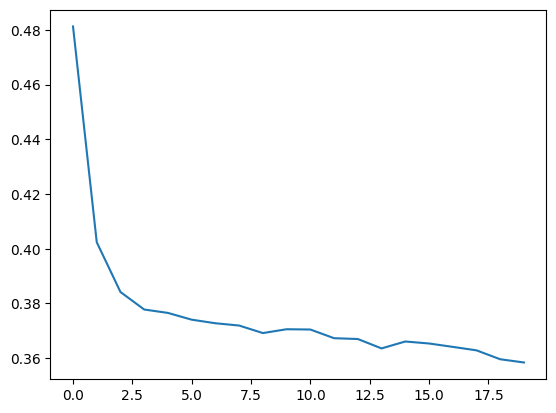

In [23]:
loss = training.history['loss']

plt.plot(loss)

# 5. Resultados

In [24]:
# Prep the test data
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:,12]


for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],14))

In [25]:
predictions = model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [26]:
predictions.shape

(431, 1)

In [27]:
predictions = np.repeat(predictions, 14, axis=1)
predictions_final = scaler.inverse_transform(predictions)

In [28]:
train = df[['AporCaudal']][:training_data_len]
test =  df[['AporCaudal']][training_data_len:]

In [29]:
predictions = predictions_final[:, 12] 

In [30]:
predictions = pd.DataFrame(predictions, index=test.index, columns=["Predictions"])


In [31]:
predictions.head(1)

,Predictions
Date,
2022-06-27,103.028458


In [32]:
test.head(1)

,AporCaudal
Date,
2022-06-27,128.342


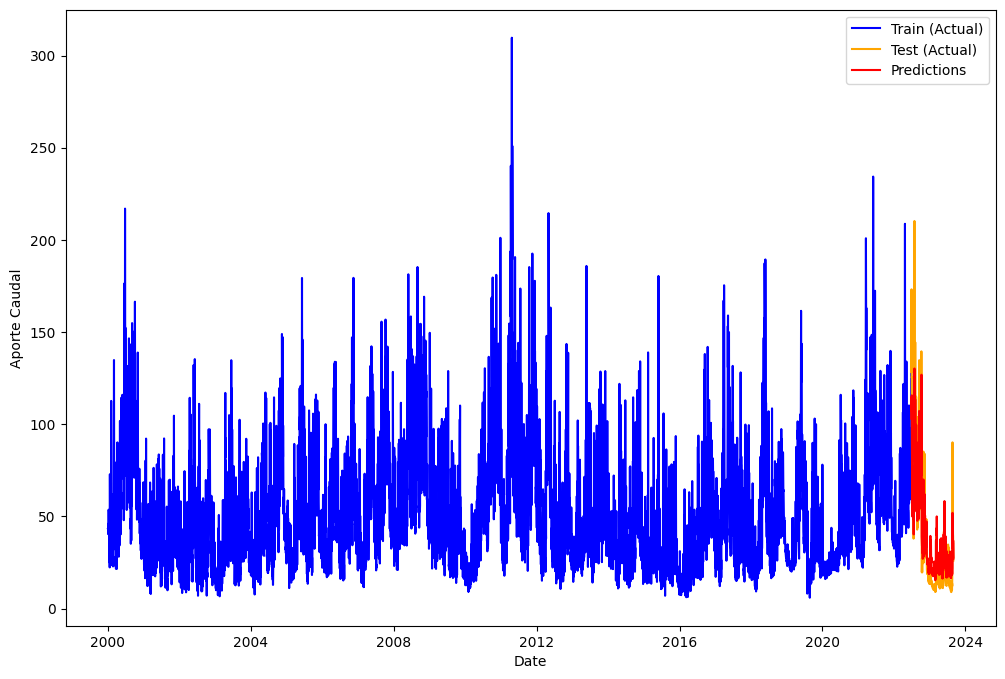

In [34]:
plt.figure(figsize=(12,8))
plt.plot(train, label="Train (Actual)", color='blue')
plt.plot(test, label="Test (Actual)", color='orange')
plt.plot(predictions, label="Predictions", color='red')
plt.xlabel("Date")
plt.ylabel("Aporte Caudal")
plt.legend()
plt.show()

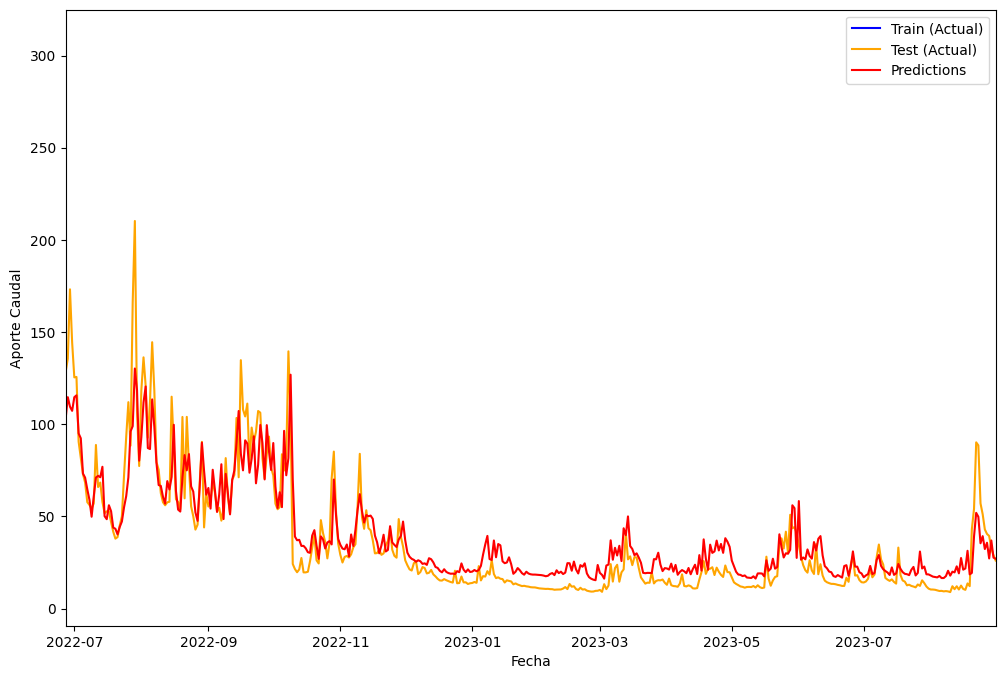

In [40]:
import matplotlib.pyplot as plt

# Definir el periodo de las predicciones (asegurándote de que las predicciones tengan un índice de fechas)
start_date = predictions.index.min()  # Primer día de las predicciones
end_date = predictions.index.max()    # Último día de las predicciones

# Graficar todo el conjunto de datos
plt.figure(figsize=(12,8))

# Graficar las series de entrenamiento y prueba
plt.plot(train, label="Train (Actual)", color='blue')
plt.plot(test, label="Test (Actual)", color='orange')

# Graficar solo las predicciones
plt.plot(predictions.index, predictions, label="Predictions", color='red')

# Ajustar el rango de fechas (zoom en el periodo de las predicciones)
plt.xlim(start_date, end_date)

# Etiquetas y leyenda
plt.xlabel("Fecha")
plt.ylabel("Aporte Caudal")
plt.legend()

# Mostrar la gráfica
plt.show()


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from math import sqrt

# Calcular MSE, MAE, RMSE y R²
mse = mean_squared_error(test['AporCaudal'], predictions['Predictions'])
mae = mean_absolute_error(test['AporCaudal'], predictions['Predictions'])
rmse = sqrt(mse)
r2 = r2_score(test['AporCaudal'], predictions['Predictions'])

# Crear un DataFrame para mostrar las métricas
metrics = {
    'Metric': ['MSE', 'MAE', 'RMSE', 'R²'],
    'Value': [mse, mae, rmse, r2]
}

metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla con las métricas
metrics_df

,Metric,Value
0,MSE,184.714252
1,MAE,9.643366
2,RMSE,13.590962
3,R²,0.826066
